## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.35,0.7,0.95,1.25,1.55] 

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in MOMENTUM:
    for nesterov in [True, False]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = {} and nesterov = {}".format(m, str(nesterov)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=m)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-m={},sesterov={}".format(m, str(nesterov))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.35 and nesterov = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.2277 - acc: 0.1974 - val_loss: 2.1572 - val_acc: 0.2413
Epoch 2/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1126 - acc: 0.2602 - val_loss: 2.0736 - val_acc: 0.2714
Epoch 3/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.0435 - acc: 0.2870 - val_loss: 2.0158 - val_acc: 0.2900
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.9951 - acc: 0.3029 - val_loss: 1.9744 - val_acc: 0.3047
Epoch 5/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.9582 - acc: 0.3157 - val_loss: 1.9413 - val_acc: 0.3201
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.9279 - acc: 0.3266 - val_loss: 1.9149 - val_acc: 0.3294
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.9034 - acc: 0.3355 - val_loss: 1.8924 - 

50000/50000 [==============================] - 6s 125us/step - loss: 2.1798 - acc: 0.2168 - val_loss: 2.0816 - val_acc: 0.2550
Epoch 2/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.0297 - acc: 0.2799 - val_loss: 1.9886 - val_acc: 0.2922
Epoch 3/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9589 - acc: 0.3098 - val_loss: 1.9347 - val_acc: 0.3173
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9113 - acc: 0.3332 - val_loss: 1.8950 - val_acc: 0.3319
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8747 - acc: 0.3485 - val_loss: 1.8634 - val_acc: 0.3520
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.8441 - acc: 0.3599 - val_loss: 1.8344 - val_acc: 0.3575
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8185 - acc: 0.3687 - val_loss: 1.8164 - val_acc: 0.3670
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 113us/step - loss: 2.2117 - acc: 0.2094 - val_loss: 2.1230 - val_acc: 0.2794
Epoch 2/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.0680 - acc: 0.2877 - val_loss: 2.0131 - val_acc: 0.3022
Epoch 3/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.9785 - acc: 0.3112 - val_loss: 1.9458 - val_acc: 0.3183
Epoch 4/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.9232 - acc: 0.3286 - val_loss: 1.9017 - val_acc: 0.3357
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.8840 - acc: 0.3414 - val_loss: 1.8678 - val_acc: 0.3457
Epoch 6/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.8538 - acc: 0.3535 - val_loss: 1.8404 - val_acc: 0.3554
Epoch 7/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.8299 - acc: 0.3629 - val_loss: 1.8215 - val_acc: 0.3654
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8131 - acc: 0.3661 - val_loss: 1.7608 - val_acc: 0.3838
Epoch 3/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7255 - acc: 0.3969 - val_loss: 1.6923 - val_acc: 0.4071
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6642 - acc: 0.4152 - val_loss: 1.6530 - val_acc: 0.4199
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6150 - acc: 0.4353 - val_loss: 1.5960 - val_acc: 0.4363
Epoch 6/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5765 - acc: 0.4477 - val_loss: 1.5695 - val_acc: 0.4479
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5407 - acc: 0.4604 - val_loss: 1.5445 - val_acc: 0.4525oss: 1.5405 - ac - ETA: 4s - loss: 1.5 - ETA: 1s - loss: 1.
Epoch 8/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5106 - acc: 0.4687 - val_loss: 

50000/50000 [==============================] - 5s 106us/step - loss: 1.8538 - acc: 0.3479 - val_loss: 1.8048 - val_acc: 0.3615
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7630 - acc: 0.3829 - val_loss: 1.7290 - val_acc: 0.3861
Epoch 4/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6983 - acc: 0.4029 - val_loss: 1.6794 - val_acc: 0.4008
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6498 - acc: 0.4225 - val_loss: 1.6500 - val_acc: 0.4130
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6075 - acc: 0.4366 - val_loss: 1.6005 - val_acc: 0.4360
Epoch 7/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5733 - acc: 0.4475 - val_loss: 1.5642 - val_acc: 0.4470
Epoch 8/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5433 - acc: 0.4581 - val_loss: 1.5487 - val_acc: 0.4532
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 116us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_a

50000/50000 [==============================] - 6s 110us/step - loss: 7.6761 - acc: 0.1005 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 120us/step - loss: 3.9824 - acc: 0.1012 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 110us/step - loss: 3.0706 - acc: 0.1027 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 104us/step - loss

In [10]:
results.keys()

dict_keys(['exp-m=0.35,sesterov=False', 'exp-m=0.95,sesterov=True', 'exp-m=0.7,sesterov=True', 'exp-m=1.25,sesterov=True', 'exp-m=0.7,sesterov=False', 'exp-m=0.95,sesterov=False', 'exp-m=0.35,sesterov=True', 'exp-m=1.25,sesterov=False', 'exp-m=1.55,sesterov=True', 'exp-m=1.55,sesterov=False'])

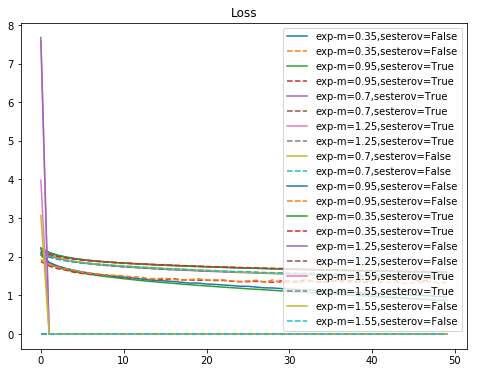

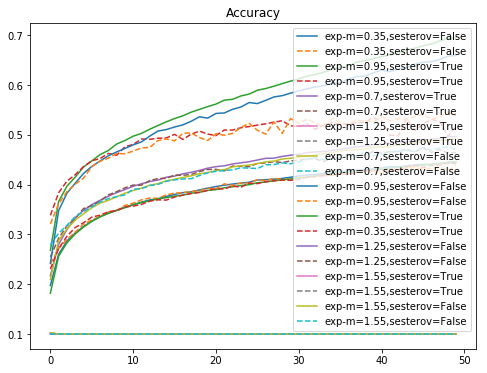

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m","k","m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()